In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df1=pd.read_csv("IMDB dataset.csv")
df2=pd.read_csv("IMDB dataset.csv")

In [4]:
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df1.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [6]:
# taking negative sentiment and deleting positive
df1 = df1[~df1.sentiment.str.contains("positive")]

In [7]:
df1.head()

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative


In [8]:
# randomly picking 500 rows
df1 = df1.sample(n=500, replace=True)

In [9]:
df1["sentiment"].value_counts()

negative    500
Name: sentiment, dtype: int64

In [10]:
#taking positive senitment and deleting negative
df2 = df2[~df2.sentiment.str.contains("negative")]

In [11]:
df2.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [12]:
# randomly picking 500 rows
df2 = df2.sample(n=500, replace=True)

In [13]:
df2["sentiment"].value_counts()

positive    500
Name: sentiment, dtype: int64

In [14]:
df1.to_csv('negative.csv')
df2.to_csv('positive.csv')

In [15]:
#concating positive and negative sentiment
frames = [df1, df2]

df = pd.concat(frames)


In [16]:
df.head()

,review,sentiment
19589,First off I'd like to point out that Sam Niel ...,negative
29713,As a professional poker dealer for over 25 yea...,negative
13666,I could tell this would be a bad one from the ...,negative
39471,This thrown together piece of fecal matter add...,negative
34825,"I live in Salt Lake City and I'm not a Mormon,...",negative


In [17]:
df["sentiment"].value_counts()

negative    500
positive    500
Name: sentiment, dtype: int64

In [18]:
class_names = ['positive', 'negative']

In [19]:
# replacing positive sentiment with 1 and negative with 0
encoding = {
    
    'positive': 1,
    'negative': 0
}

In [20]:
reviews = df['review'].values.tolist()
sentiments = df['sentiment'].tolist()

In [21]:
from sklearn.model_selection import train_test_split,KFold
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=.2)

In [22]:
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [23]:
trn, val, preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                          x_test=X_test, y_test=y_test,
                                          class_names=class_names,
                                          preprocess_mode='distilbert',
                                          maxlen=350)

preprocessing train...
language: en
train sequence lengths:
	mean : 226
	95percentile : 543
	99percentile : 917


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 225
	95percentile : 604
	99percentile : 980


task: text classification


In [24]:
model = text.text_classifier('distilbert', train_data=trn, preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [25]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [26]:
learner.fit_onecycle(2e-4, 4)



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/4
134/134 [==============================] - 368s 3s/step - loss: 0.5488 - accuracy: 0.7163 - val_loss: 0.5478 - val_accuracy: 0.7450
Epoch 2/4
134/134 [==============================] - 358s 3s/step - loss: 0.4272 - accuracy: 0.8188 - val_loss: 0.4030 - val_accuracy: 0.8350
Epoch 3/4
134/134 [==============================] - 357s 3s/step - loss: 0.4602 - accuracy: 0.7663 - val_loss: 0.5991 - val_accuracy: 0.7550
Epoch 4/4
134/134 [==============================] - 369s 3s/step - loss: 0.2205 - accuracy: 0.9275 - val_loss: 0.4853 - val_accuracy: 0.8200


In [27]:
learner.validate(val_data=(val), class_names=class_names)

              precision    recall  f1-score   support

    positive       0.81      0.86      0.84       107
    negative       0.83      0.77      0.80        93

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



array([[92, 15],
       [21, 72]], dtype=int64)

In [32]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [54]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [56]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
134/134 [==============================] - 751s 6s/step - loss: 0.6917 - accuracy: 0.5487
Epoch 2/4
134/134 [==============================] - 760s 6s/step - loss: 0.6251 - accuracy: 0.6463
Epoch 3/4
134/134 [==============================] - 767s 6s/step - loss: 2.7107 - accuracy: 0.5050
Epoch 4/4
134/134 [==============================] - 764s 6s/step - loss: 19.9845 - accuracy: 0.4787


done.
Visually inspect loss plot and select learning rate associated with falling loss


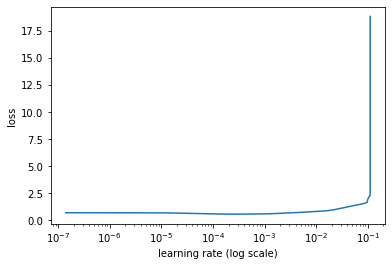

In [58]:
learner.lr_find(show_plot=True, max_epochs=4)

In [26]:
learner1 = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [27]:
learner1.fit_onecycle(2e-4,4)



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/4
134/134 [==============================] - 767s 6s/step - loss: 0.5095 - accuracy: 0.7387 - val_loss: 0.6121 - val_accuracy: 0.7600
Epoch 2/4
134/134 [==============================] - 783s 6s/step - loss: 0.5058 - accuracy: 0.7613 - val_loss: 0.7520 - val_accuracy: 0.4750
Epoch 3/4
134/134 [==============================] - 773s 6s/step - loss: 0.7121 - accuracy: 0.5088 - val_loss: 0.6955 - val_accuracy: 0.4750
Epoch 4/4
134/134 [==============================] - 773s 6s/step - loss: 0.6993 - accuracy: 0.5013 - val_loss: 0.6950 - val_accuracy: 0.4750


In [28]:
learner1.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

    positive       0.47      1.00      0.64        95
    negative       0.00      0.00      0.00       105

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.47      0.31       200



C:\Users\moshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 95,   0],
       [105,   0]], dtype=int64)

In [45]:
opt = keras.optimizers.Adam(learning_rate=0.01)


In [29]:
learner.fit(2e-5,4)

Epoch 1/4
134/134 [==============================] - 791s 6s/step - loss: 0.6957 - accuracy: 0.5025 - val_loss: 0.6937 - val_accuracy: 0.4750
Epoch 2/4
134/134 [==============================] - 792s 6s/step - loss: 0.6953 - accuracy: 0.5075 - val_loss: 0.6969 - val_accuracy: 0.4750
Epoch 3/4
134/134 [==============================] - 801s 6s/step - loss: 0.6967 - accuracy: 0.4975 - val_loss: 0.7008 - val_accuracy: 0.4750
Epoch 4/4
134/134 [==============================] - 800s 6s/step - loss: 0.6948 - accuracy: 0.5063 - val_loss: 0.6920 - val_accuracy: 0.5250


In [67]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00        99
    negative       0.51      1.00      0.67       101

    accuracy                           0.51       200
   macro avg       0.25      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



C:\Users\moshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,  99],
       [  0, 101]], dtype=int64)

In [3]:
from ktrain import text

In [4]:
data_train = pd.read_csv('data_train.csv', encoding='utf-8')
data_test = pd.read_csv('data_test.csv', encoding='utf-8')

X_train = data_train.review.tolist()
X_test = data_test.review.tolist()

y_train = data_train.sentiment.tolist()
y_test = data_test.sentiment.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['positive', 'negative']

print('size of training set: %s' % (len(data_train['review'])))
print('size of validation set: %s' % (len(data_test['review'])))
print(data.sentiment.value_counts())

data.head(10)

size of training set: 800
size of validation set: 200
positive    500
negative    500
Name: sentiment, dtype: int64


,review,sentiment
0,Excellent special effects make this disaster m...,positive
1,One of the funniest films I ever saw in the th...,positive
2,I waited for this movie to come out for a whil...,positive
3,"This unassuming, fairly routine series deserve...",positive
4,"Idiotic hack crooks, a babe, a safe, a plan an...",positive
5,"I was brought up on Doc Savage,and was petrifi...",positive
6,"Before I comment about this movie, you should ...",positive
7,I just saw The Big Trail in Vienna's Filmmuseu...,positive
8,Maybe not the most original way of telling a s...,positive
9,Anne (Natalie Portman) tells us about how much...,positive


In [17]:
data.tail(10)

,review,sentiment
990,"My mother told me not to go to see ""Kadosh"" --...",negative
991,"Well, I'm a huge fan and follower of Elizabeth...",negative
992,I rented this DVD because I'm a big science fi...,negative
993,"The Film must have been shot in a day,there ar...",negative
994,POSSIBLE MINOR SPOILER<br /><br />It's not a t...,negative
995,If you make a suspense movie it is kind of imp...,negative
996,This film was horrible. The script is COMPLETE...,negative
997,Jenny Neumann (from the sexploitation flick MI...,negative
998,Millie is a sap. She marries a rich guy named ...,negative
999,Shame to see an interesting story diluted into...,negative


In [42]:
import time 

message = 'I dont feel so good as today is my exam'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: negative (0.32)


In [5]:
class_names = ['positive', 'negative']

In [6]:
# replacing positive sentiment with 1 and negative with 0
encoding = {
    
    'positive': 1,
    'negative': 0
}

In [40]:
predictor.save("models/bert_model")

In [8]:
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [12]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [13]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [14]:
learner100 = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=4)

In [15]:
learner100.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
200/200 [==============================] - 855s 4s/step - loss: 0.6844 - accuracy: 0.5913 - val_loss: 0.4843 - val_accuracy: 0.7750
Epoch 2/4
200/200 [==============================] - 850s 4s/step - loss: 0.3861 - accuracy: 0.8400 - val_loss: 0.2957 - val_accuracy: 0.8850
Epoch 3/4
200/200 [==============================] - 857s 4s/step - loss: 0.1652 - accuracy: 0.9413 - val_loss: 0.2435 - val_accuracy: 0.8900
Epoch 4/4
200/200 [==============================] - 839s 4s/step - loss: 0.0417 - accuracy: 0.9837 - val_loss: 0.2693 - val_accuracy: 0.9200


In [16]:
learner100.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

    positive       0.90      0.95      0.92       100
    negative       0.95      0.89      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



array([[95,  5],
       [11, 89]], dtype=int64)